In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np
from scipy.stats import pearsonr

In [2]:
os.chdir('G:\\Campus\\4th Year\\Stat in Practice 2\\Project\\Research Proposal\\Data')

In [3]:
df = pd.read_csv('abalone.csv')

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
df.describe(include = 'all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


In [6]:
#Removing rows which has Height = 0
df = df[(df['Height'] > 0) & (df['Height'] < 1)]
df.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4174,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.524081,0.407953,0.139346,0.829061,0.359483,0.180668,0.238859,9.935553
std,NaN,0.120079,0.099228,0.038811,0.490395,0.221980,0.109614,0.139219,3.224474
min,NaN,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.442125,0.186125,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153750,0.502000,0.253000,0.328875,11.000000


In [7]:
#Missing value percentages
missing_values = df.isna().mean()*100
missing_values

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64

#### Outlier Detection

In [8]:
num_dependents = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight']

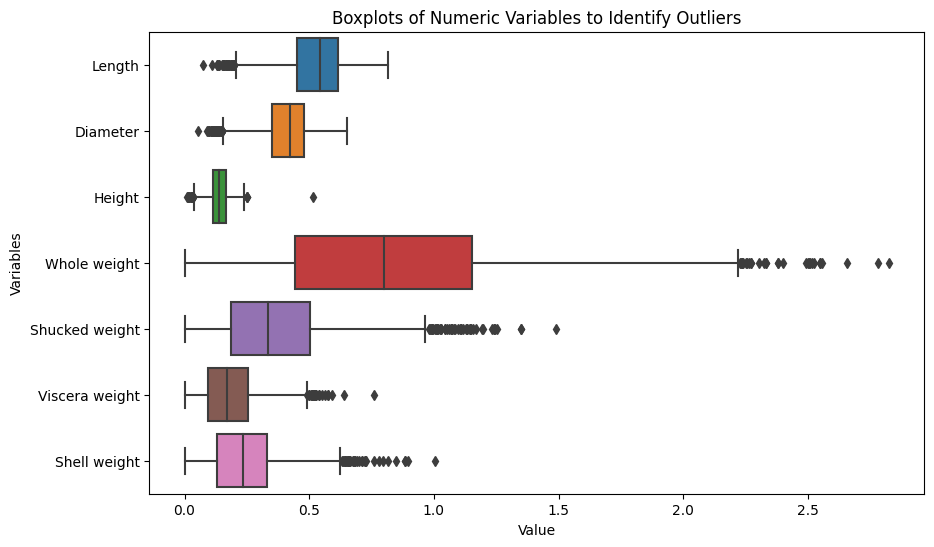

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_dependents], orient='h')
plt.title('Boxplots of Numeric Variables to Identify Outliers')
plt.xlabel('Value')
plt.ylabel('Variables')

# Show the plot
plt.show()

In [10]:
# Calculate the outlier percentage for each variable
outlier_percentages = []
for variable in num_dependents:
    # Assuming 'df' is your DataFrame and the column name matches the variable
    
    # Calculate the quartiles
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Count the number of outliers
    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)][variable].count()
    
    # Calculate the outlier percentage
    outlier_percentage = outliers / len(df) * 100
    
    # Append the outlier percentage to the list
    outlier_percentages.append(outlier_percentage)
    
    # Remove the outliers from the DataFrame
    df = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]
    
    # Print the outlier percentage for the current variable
    print(f"{variable}: {outlier_percentage:.2f}%")

# Print the updated DataFrame without outliers
print("\nUpdated DataFrame without outliers:")
print(df.describe(include='all'))


Length: 1.17%
Diameter: 0.29%
Height: 0.12%
Whole weight: 0.68%
Shucked weight: 0.61%
Viscera weight: 0.35%
Shell weight: 0.69%

Updated DataFrame without outliers:
         Sex       Length     Diameter       Height  Whole weight  \
count   4013  4013.000000  4013.000000  4013.000000   4013.000000   
unique     3          NaN          NaN          NaN           NaN   
top        M          NaN          NaN          NaN           NaN   
freq    1463          NaN          NaN          NaN           NaN   
mean     NaN     0.524533     0.408242     0.139090      0.809481   
std      NaN     0.110511     0.091758     0.035588      0.445060   
min      NaN     0.205000     0.155000     0.040000      0.042500   
25%      NaN     0.450000     0.350000     0.115000      0.447500   
50%      NaN     0.540000     0.420000     0.140000      0.794500   
75%      NaN     0.610000     0.480000     0.165000      1.133000   
max      NaN     0.760000     0.600000     0.240000      2.127500   

      

#### Descriptive Analysis

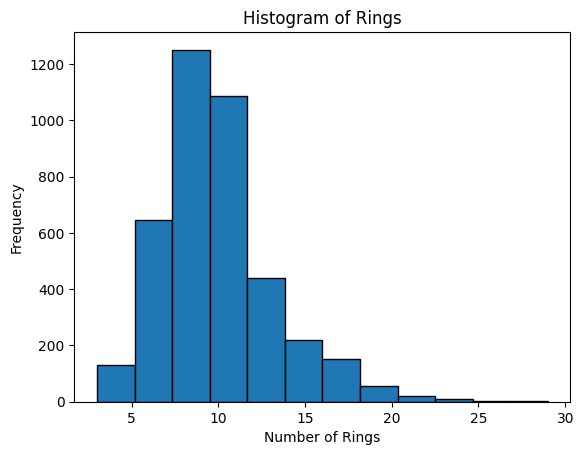

In [11]:
plt.hist(df['Rings'], bins = 12, edgecolor = 'black')

plt.xlabel('Number of Rings')
plt.ylabel('Frequency')
plt.title('Histogram of Rings')

plt.show()

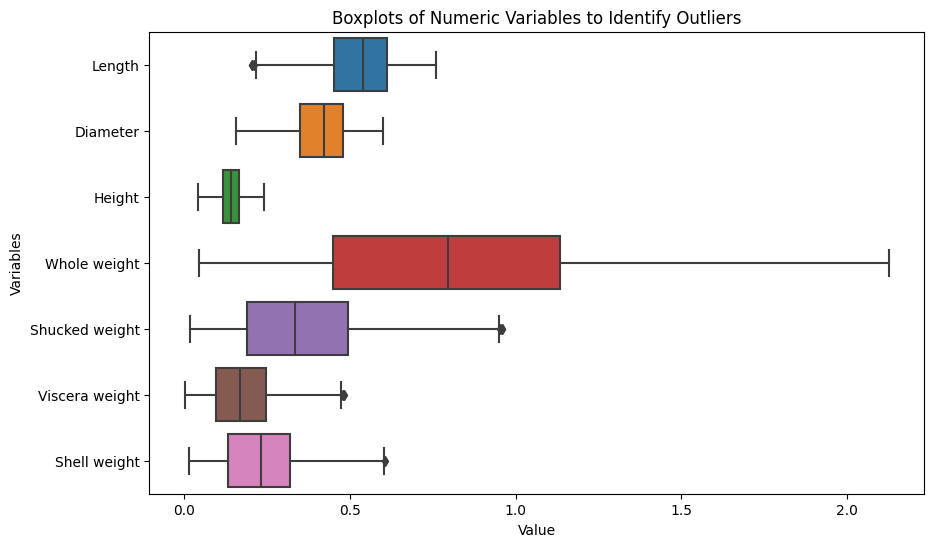

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_dependents], orient='h')
plt.title('Boxplots of Numeric Variables to Identify Outliers')
plt.xlabel('Value')
plt.ylabel('Variables')

# Show the plot
plt.show()

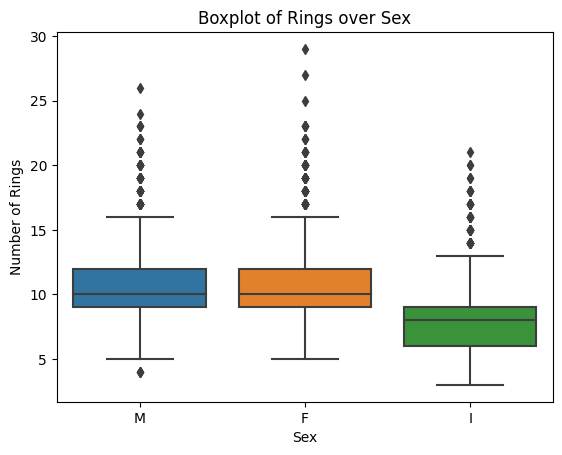

In [13]:
sns.boxplot(x = 'Sex', y='Rings', data = df)
plt.title('Boxplot of Rings over Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Rings')


plt.show()

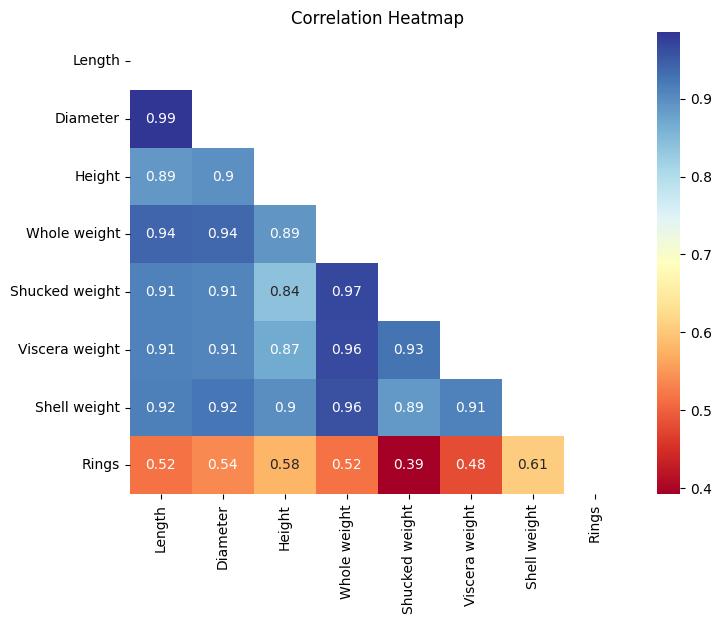

In [14]:
# Create a subset of the DataFrame with the numerical variables
df_subset = df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight','Rings']]

# Calculate the correlation matrix
corr_matrix = df_subset.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap using the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlBu", mask=mask)
plt.title('Correlation Heatmap')

plt.show()

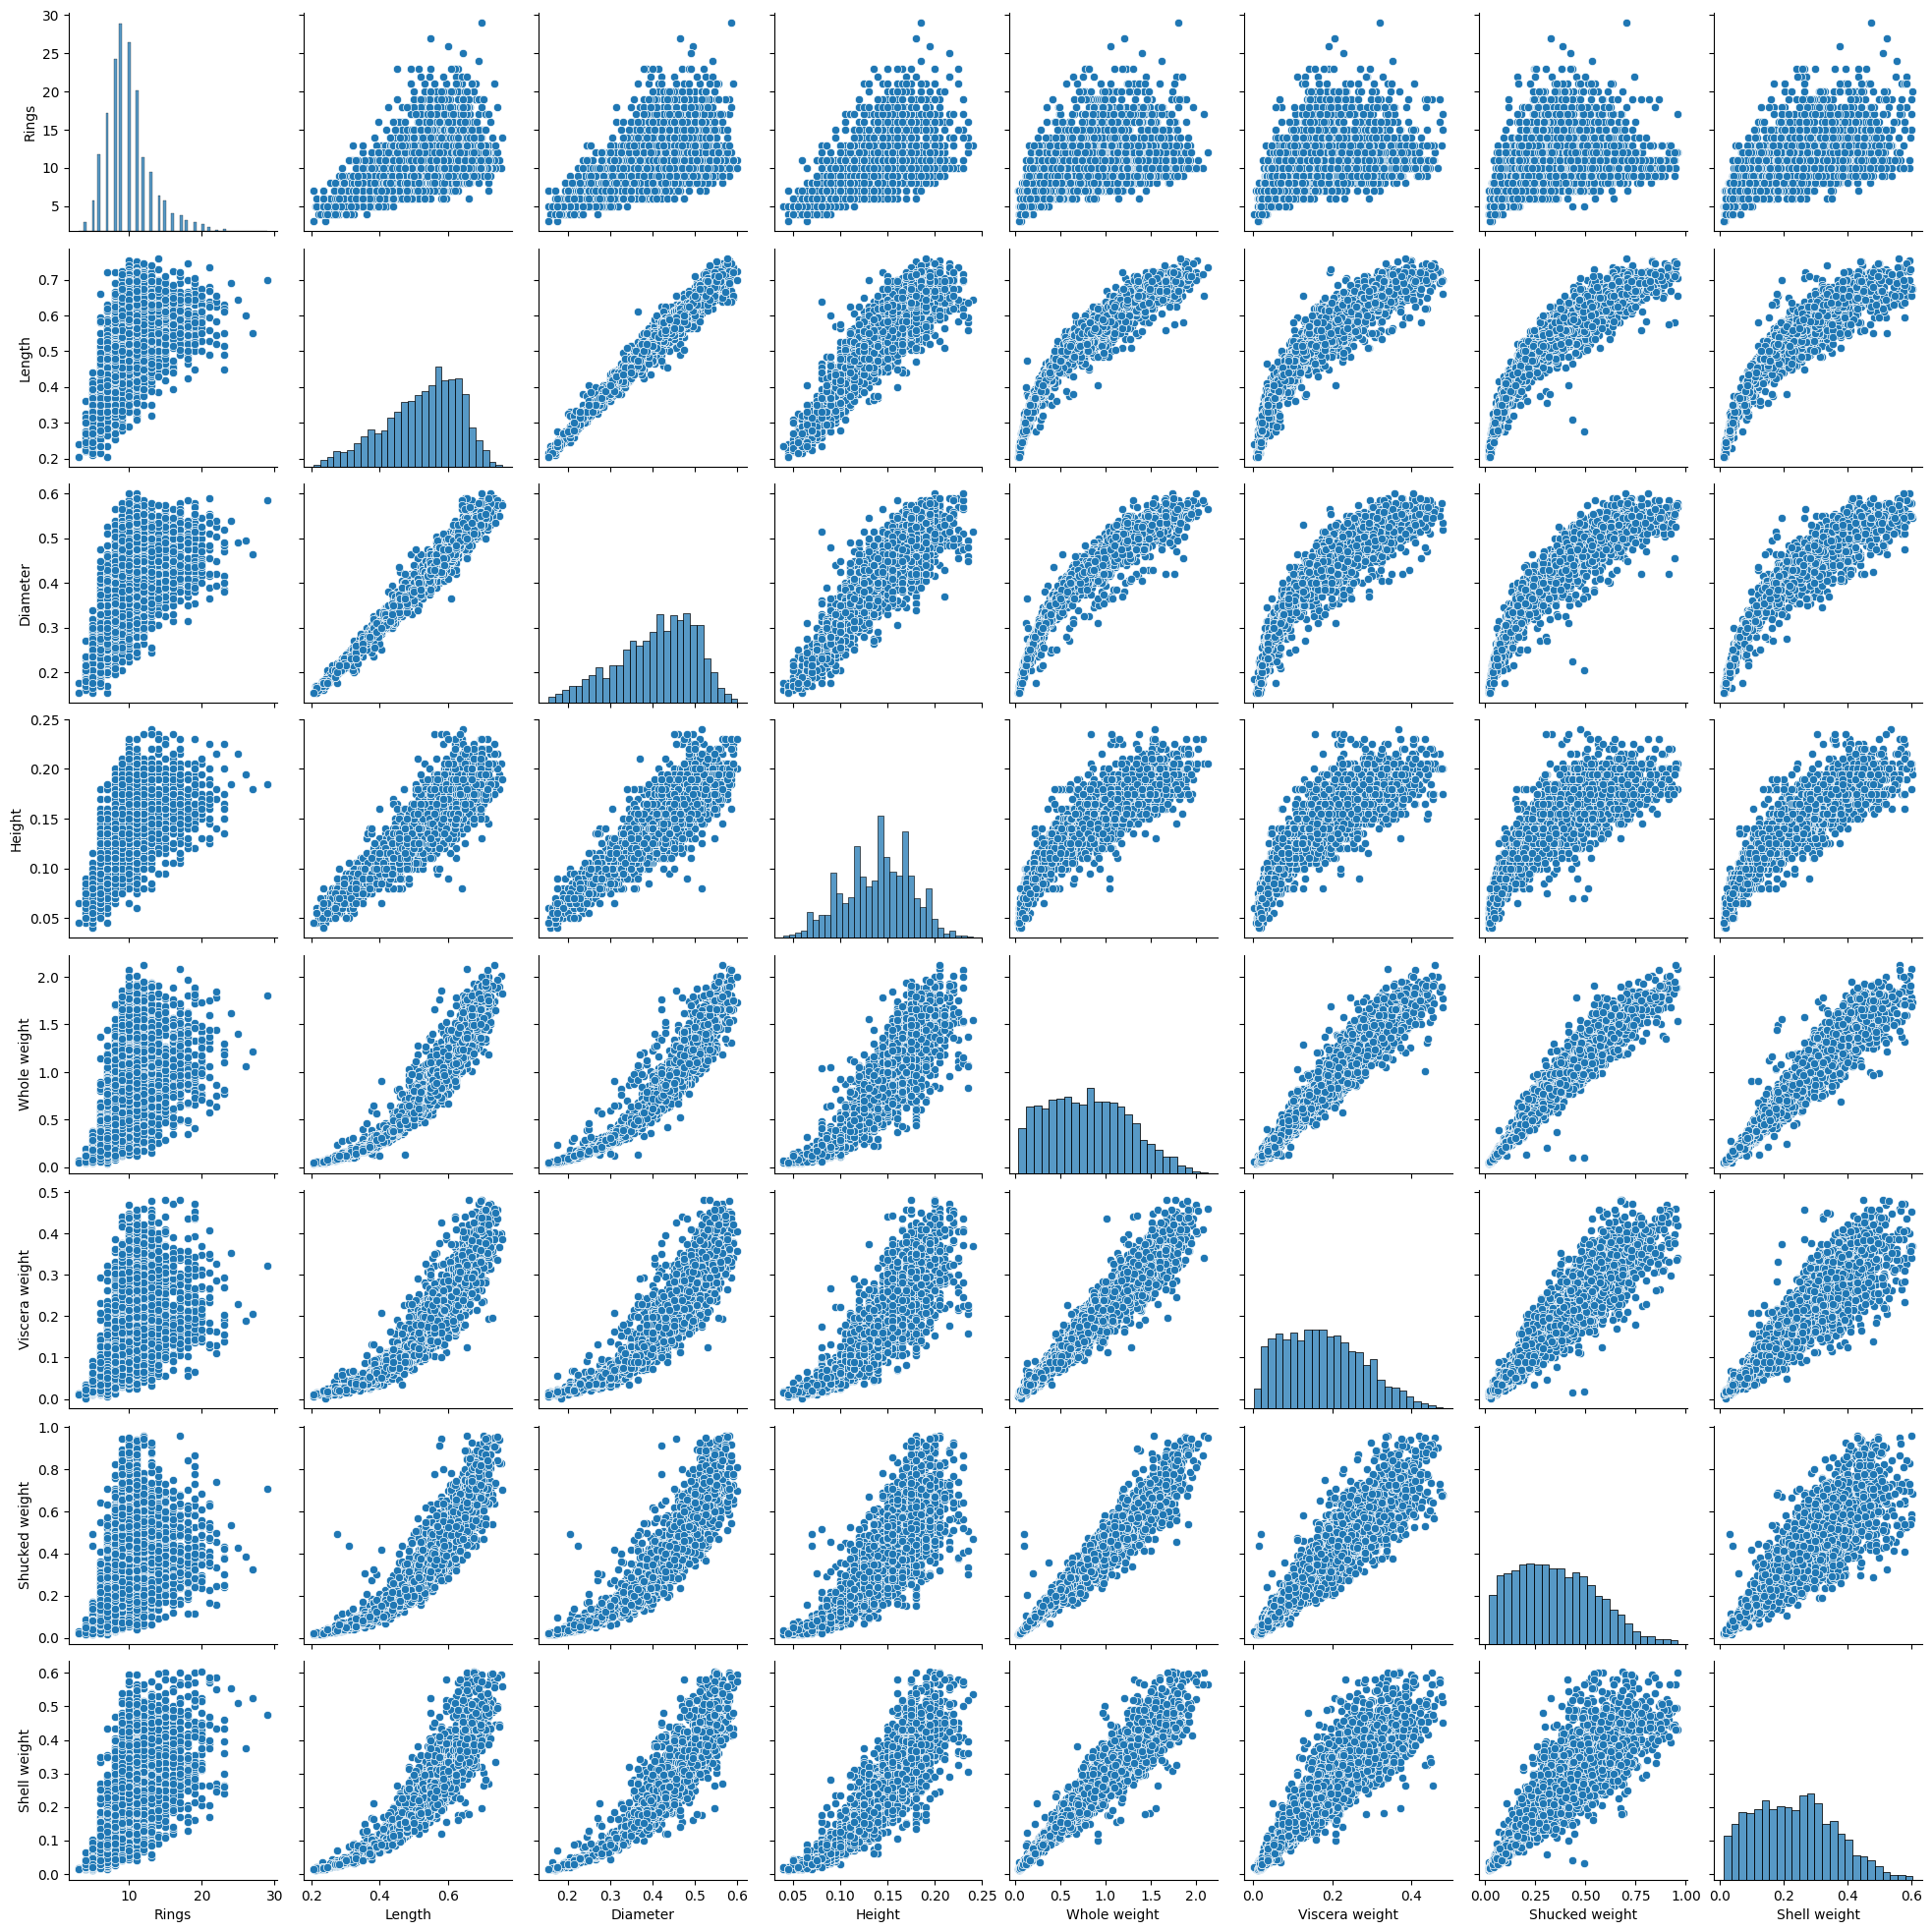

In [25]:
sns.pairplot(df, vars = ['Rings', 'Length', 'Diameter', 'Height', 'Whole weight','Viscera weight','Shucked weight','Shell weight']);

#### MLR Model for predict number of rings

In [15]:
# Creating dummy variables for 'Sex'
df = pd.get_dummies(df, columns=['Sex'], prefix=['Sex'])

# Dropping one dummy column to avoid multicollinearity (Sex_I would then be the base category)
df.drop('Sex_I', axis=1, inplace=True)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0


In [16]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X = df.drop('Rings', axis = 1)
y = df['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Adding a constant column for the intercept term
X_train = sm.add_constant(X_train)

# Fitting the initial MLR model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Printing the summary of the MLR model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     374.5
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:52:30   Log-Likelihood:                -7042.2
No. Observations:                3210   AIC:                         1.410e+04
Df Residuals:                    3200   BIC:                         1.417e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.2214      0.372      8.

##### Removing the length variable since it's non significant

In [18]:
X_train = X_train.drop('Length', axis = 1)
X_test = X_test.drop('Length', axis = 1)

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     421.0
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:52:31   Log-Likelihood:                -7043.0
No. Observations:                3210   AIC:                         1.410e+04
Df Residuals:                    3201   BIC:                         1.416e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.0439      0.341      8.

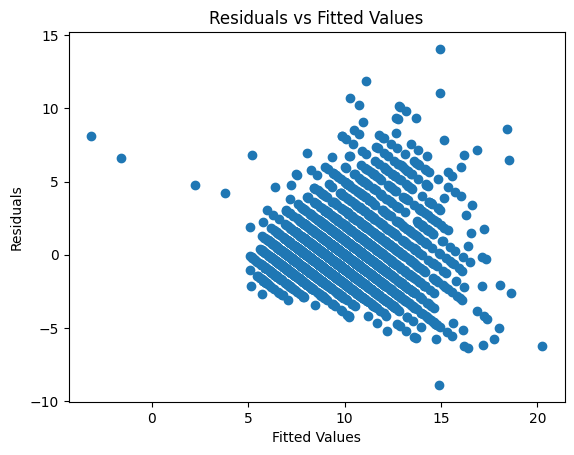

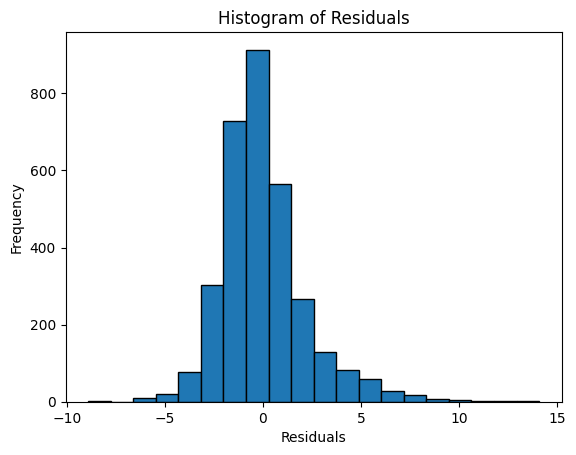

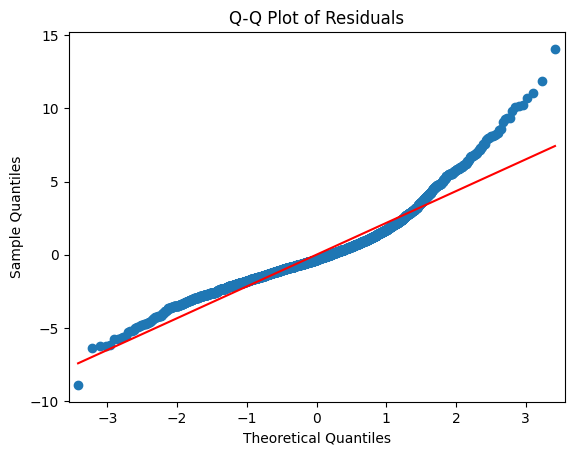

In [19]:
# Fitting the second MLR model
model = sm.OLS(y_train, X_train).fit()

# Printing the summary of the MLR model
print(model.summary())

# Check assumptions using diagnostic plots
residuals = model.resid


# Residuals vs Fitted Values plot
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Plotting the histogram of residuals
plt.hist(residuals, bins=20, edgecolor = 'black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Plotting a Q-Q plot of residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIF scores
vif = pd.DataFrame()
vif["Feature"] = X_train.columns
vif["VIF Score"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Print the VIF scores
print(vif)
print("\n")

          Feature   VIF Score
0           const   79.012541
1        Diameter   10.045274
2          Height    6.294852
3    Whole weight  102.574573
4  Shucked weight   26.143559
5  Viscera weight   16.141110
6    Shell weight   22.822054
7           Sex_F    1.969860
8           Sex_M    1.839607




In [21]:
# Add constant term to the training set
X_train_with_const = sm.add_constant(X_train)    #No change if there is a constant term already.

# Fit the model
model = sm.OLS(y_train, X_train_with_const).fit()

# Predict on the test set
X_test_with_const = sm.add_constant(X_test)
y_pred = model.predict(X_test_with_const)


RMSE of test data(Rounded):  2.1114642892037776
RMSE of training data: 2.170868746994807
MAPE: 15.12%
Accuracy: 84.88 %
Correlation coefficient: 0.7415548687393461


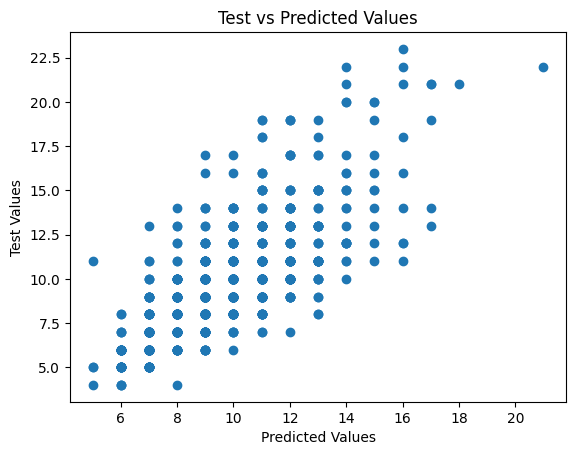

In [23]:
y_pred_round = round(y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_round)
print("RMSE of test data(Rounded): ", np.sqrt(mse))

# Predict on the training set
X_train_with_const = sm.add_constant(X_train)
y_pred_train = model.predict(X_train_with_const)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
print("RMSE of training data:", np.sqrt(mse_train))

# Calculate the MAPE
mape = np.mean(np.abs((y_test - y_pred_round) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")
print("Accuracy:", round(100-mape,2), "%")

# Calculate the correlation coefficient between y_test and y_test_round
correlation_coef, _ = pearsonr(y_test, y_pred_round)
print("Correlation coefficient:", correlation_coef)

# Test vs Predicted plot
plt.scatter(y_pred_round, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values')
plt.title('Test vs Predicted Values')
plt.show()